# 🛒 Projeto de Análise de Performance de Vendas de um E-commerce

Este projeto tem como objetivo analisar os dados de vendas de um e-commerce, utilizando Python (pandas), SQL e Power BI.

Serão realizadas análises importantes como:
- Porcentagem de pedidos cancelados
- Ticket médio por cliente
- Receita total por canal

Além disso, todo o processo envolve automação, limpeza de dados e visualizações no Power BI, com foco em insights reais que ajudam na tomada de decisão.


In [ ]:
# Limpeza do Terminal
from os import system, name
system('cls')

# 📦 Importando bibliotecas
import pandas as pd

# 📂 Lendo o arquivo CSV com os dados limpos
df = pd.read_csv('../dados2.limpos.limpos.csv' )

# 👀 Visualizando os dados
df.head()
print(df['canal'].unique())
print(df['forma_pagamento'].unique())
print(df['status'].unique())

['Whatsapp' 'Ifood' 'Site' 'Instagram' nan]
['Cartão' 'Pix' 'Dinheiro' nan]
['Entregue' 'Cancelado' 'Pendente' nan]


## 📊 Porcentagem de Pedidos Cancelados


In [13]:
# 🔍 Contando quantos pedidos foram cancelados
cancelados = df[df['status'] == 'Cancelado']

# 🧮 Calculando a porcentagem de cancelamentos
percentual_cancelado = (len(cancelados) / len(df)) * 100

# 🖨️ Exibindo o resultado com 2 casas decimais
print(f'Porcentagem de pedidos cancelados: {percentual_cancelado:.2f}%')

# 🖨️ Salvando o resultado da análise em csv
pd.DataFrame([{'percentual_cancelado': round(percentual_cancelado, 2)}]) \
  .to_csv('porcentagem_cancelados.csv', index=False, encoding='utf-8')


Porcentagem de pedidos cancelados: 32.33%


📌 **Conclusão**: Aproximadamente 32,33% dos pedidos foram cancelados, o que pode indicar problemas no processo de pagamento, logística ou insatisfação dos clientes.


## 📊 Ticket Médio por Cliente

In [15]:

# Agrupando os dados por cliente e filtrando apenas os pedidos entregues
ticket_medio_cliente = df[df['status'] == 'Entregue'].groupby('cliente')['valor'].mean().round(2)

# Exibindo os resultados
print(ticket_medio_cliente.head())

# 🖨️ Salvando o resultado da análise em csv
ticket_medio_cliente.to_csv('ticket_medio_cliente.csv', encoding='utf-8')

cliente
Ana Souza         48.83
Bruno Mello       53.27
Carlos Lima       47.58
Fernanda Rocha    52.86
Luana Martins     45.45
Name: valor, dtype: float64


📌 **Conclusão**: O ticket médio por cliente ficou entre R$45,45 e R$53,27. Clientes como Bruno Mello e Fernanda Rocha estão entre os que mais gastam por pedido.


## 📊 Receita Total por Canal

C:\Users\Nicol\AppData\Local\Temp\ipykernel_34184\3162069984.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Nicol\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


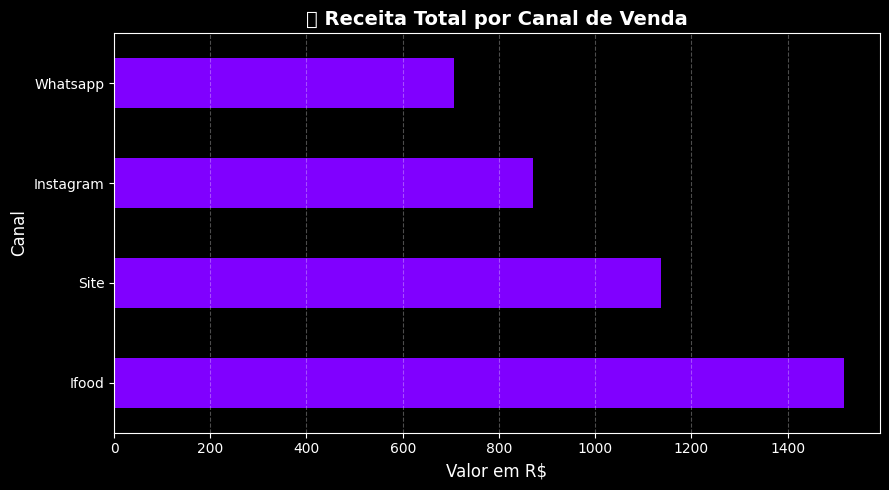

canal
Ifood        1516.25
Site         1137.30
Instagram     869.96
Whatsapp      706.58
Name: valor, dtype: float64


In [19]:

import matplotlib.pyplot as plt

# Estilo dark
plt.style.use('dark_background')

# Agrupandp por canal e somando os valores dos pedidos entregues
receita_por_canal = df[df['status'] == 'Entregue'].groupby('canal')['valor'].sum().round(2)

# Criando o gráfico
plt.figure(figsize=(9,5))
receita_por_canal.sort_values(ascending=False).plot(kind='barh', color='#8000FF')  

# Títulos e rótulos
plt.title('📊 Receita Total por Canal de Venda', fontsize=14, weight='bold')
plt.xlabel('Valor em R$', fontsize=12)
plt.ylabel('Canal', fontsize=12)

# Grid leve e layout ajustado
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 🖨️ Salvando o resultado da análise em csv
receita_por_canal.to_csv('receita_total_canal.csv', encoding='utf-8')

print(receita_por_canal.sort_values(ascending=False))

📌 **Conclusão**: O canal com maior receita foi o iFood (R$1516,25), seguido pelo site (R$1137,30), mostrando que essas plataformas geram mais retorno financeiro.
